In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date']=pd.to_datetime(df['date'])
df=df.set_index('date')
# Clean data
df= df[(df['value'] >= df['value'].quantile(0.025))&(df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


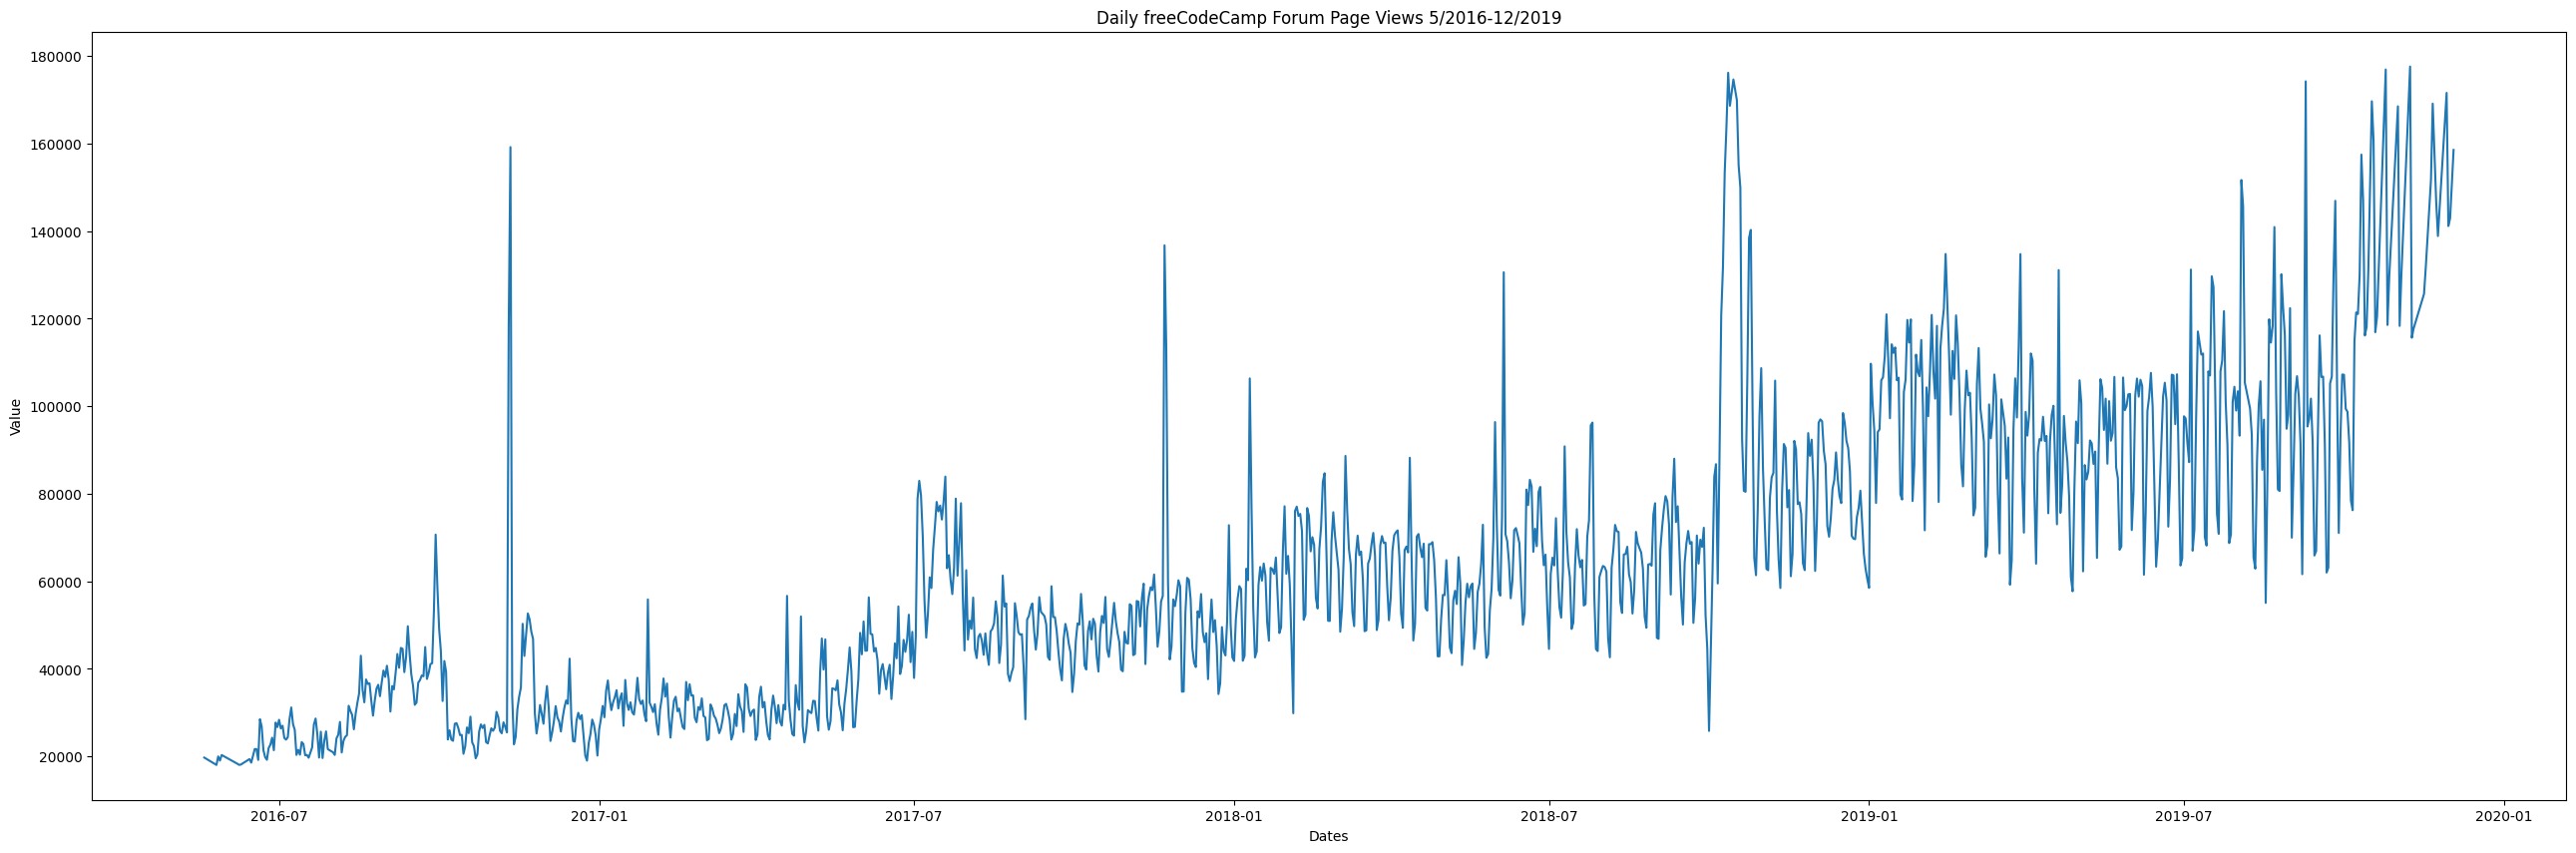

In [3]:
fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Dates')
plt.ylabel('Value')
sns.lineplot(data=df, legend=False)

fig.savefig('Daily freeCodeCamp Forum Page Views')


KeyError: 'date'

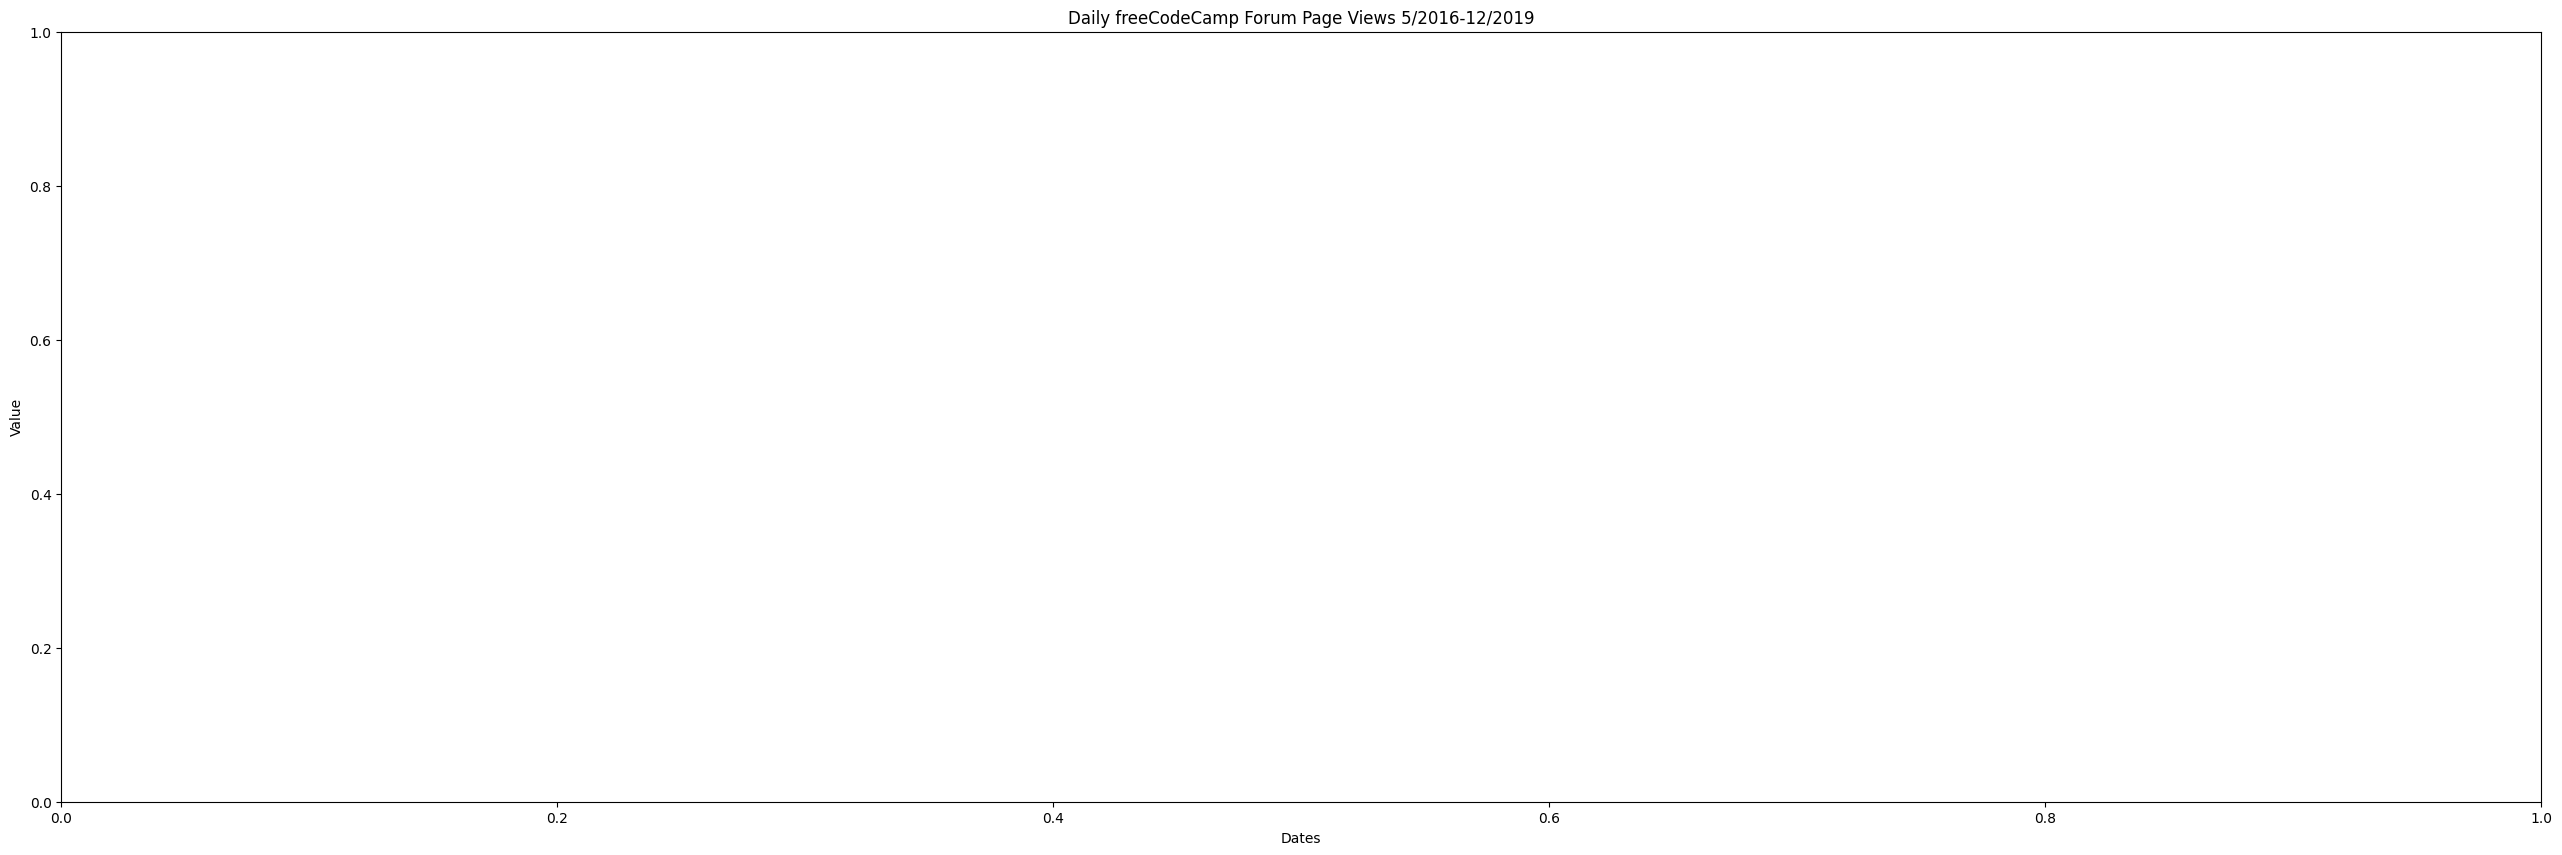

In [4]:
fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Dates')
plt.ylabel('Value')
sns.barplot(data=df,x=df['date'],y=df['value'])

fig.savefig('Daily freeCodeCamp Forum Page Views')


In [ ]:

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar["Years"] = df_bar.index.year
    df_bar["Months"] = df_bar.index.month_name()
    df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
    df_bar = df_bar.rename(columns={"value": "Average Page Views"})
    df_bar = df_bar.reset_index()
    missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

    df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
    ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

    chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

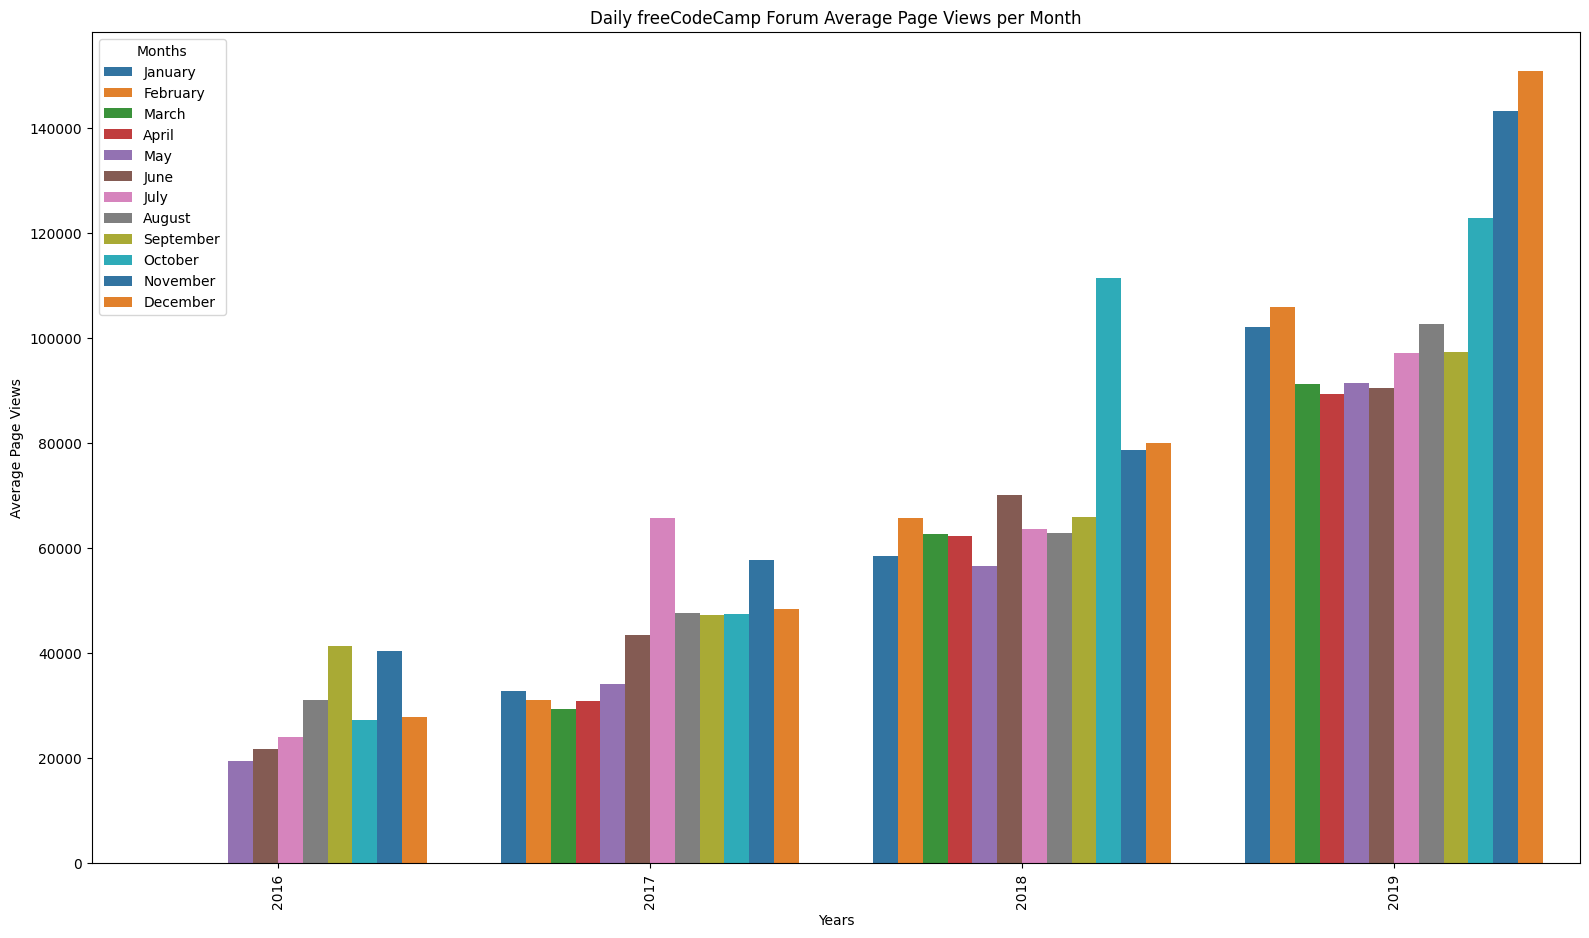

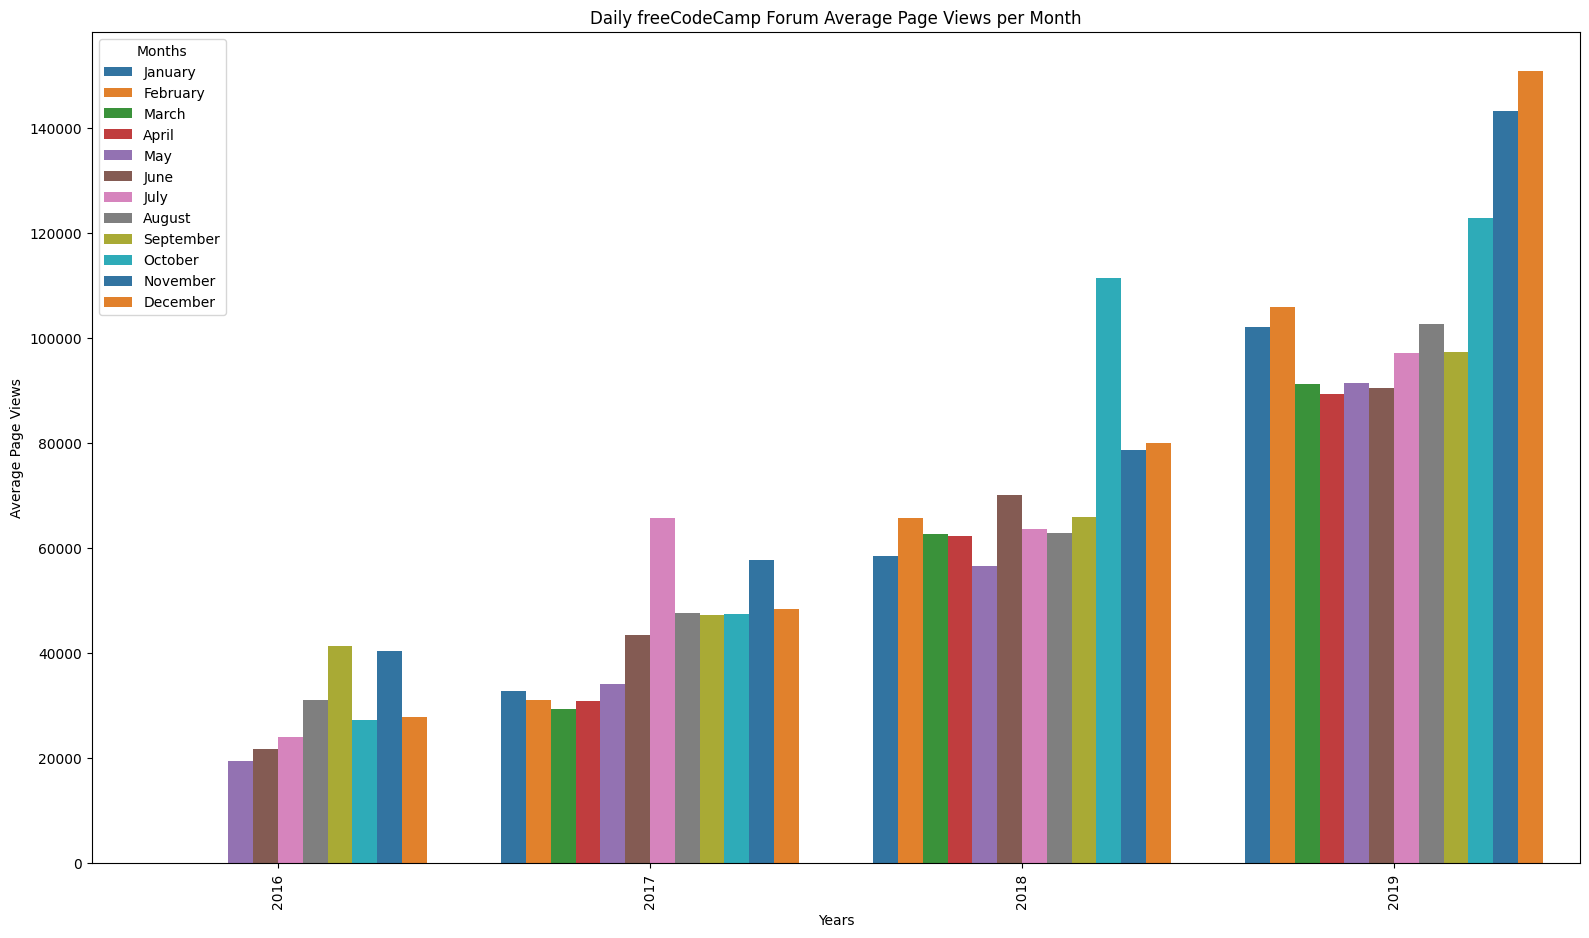

In [ ]:
draw_bar_plot()

In [ ]:
def draw_line_plot():
    # Draw line plot





    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


In [ ]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


In [10]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box


,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [13]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.reset_index().copy(deep=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['day'] = df_box['date'].dt.day
    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)
    
    # Yearly boxplot
    sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
    axes[0].set_title("Gráfico de caja por año (Tendencia)")
    axes[0].set_xlabel("Año")
    axes[0].set_ylabel("Páginas vistas")
    
    # Monthly boxplot
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
    axes[1].set_title("Gráfico de caja por mes (Estacionalidad)")
    axes[1].set_xlabel("Mes")
    axes[1].set_ylabel("Páginas vistas")

    # Guardar imagen y devolver fig (no cambiar esta parte)
    fig.savefig('box_plot.png')
    return fig


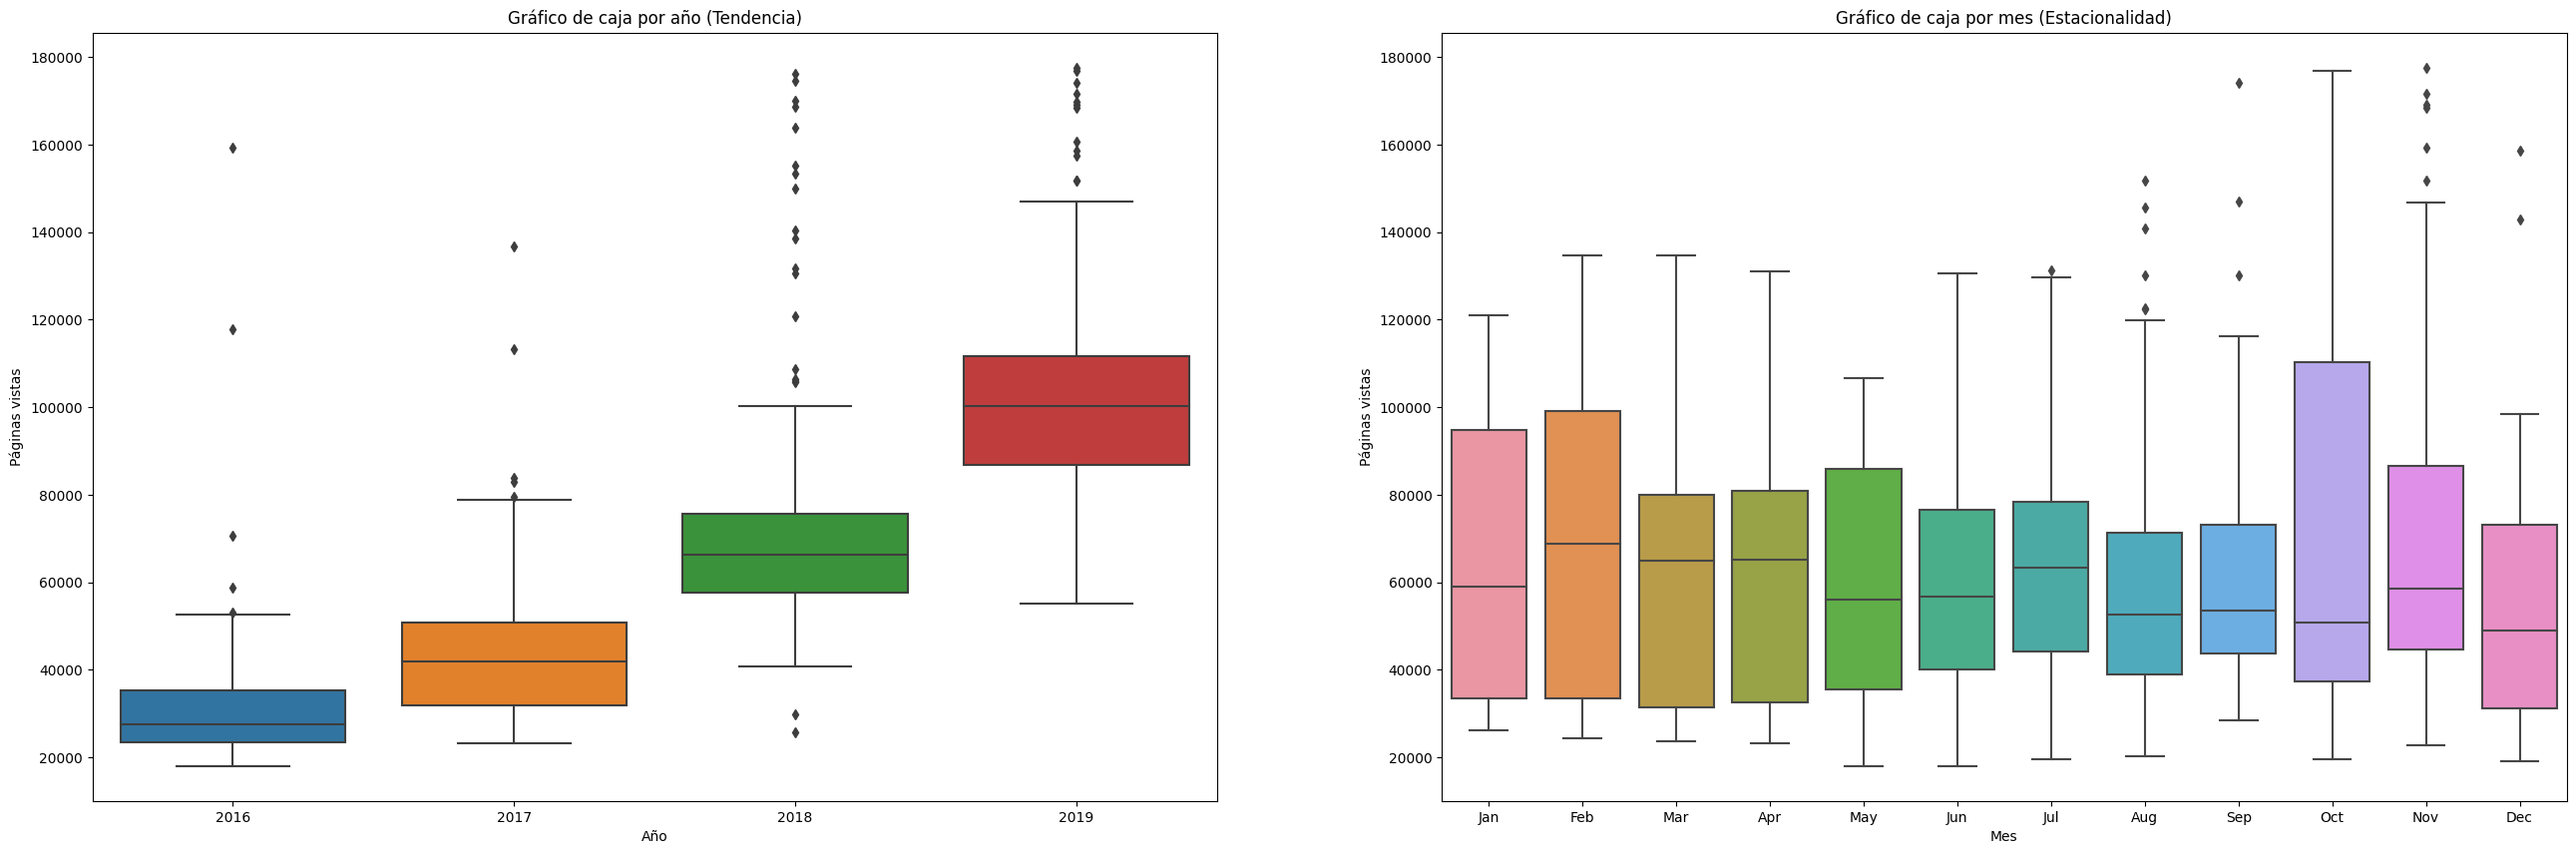

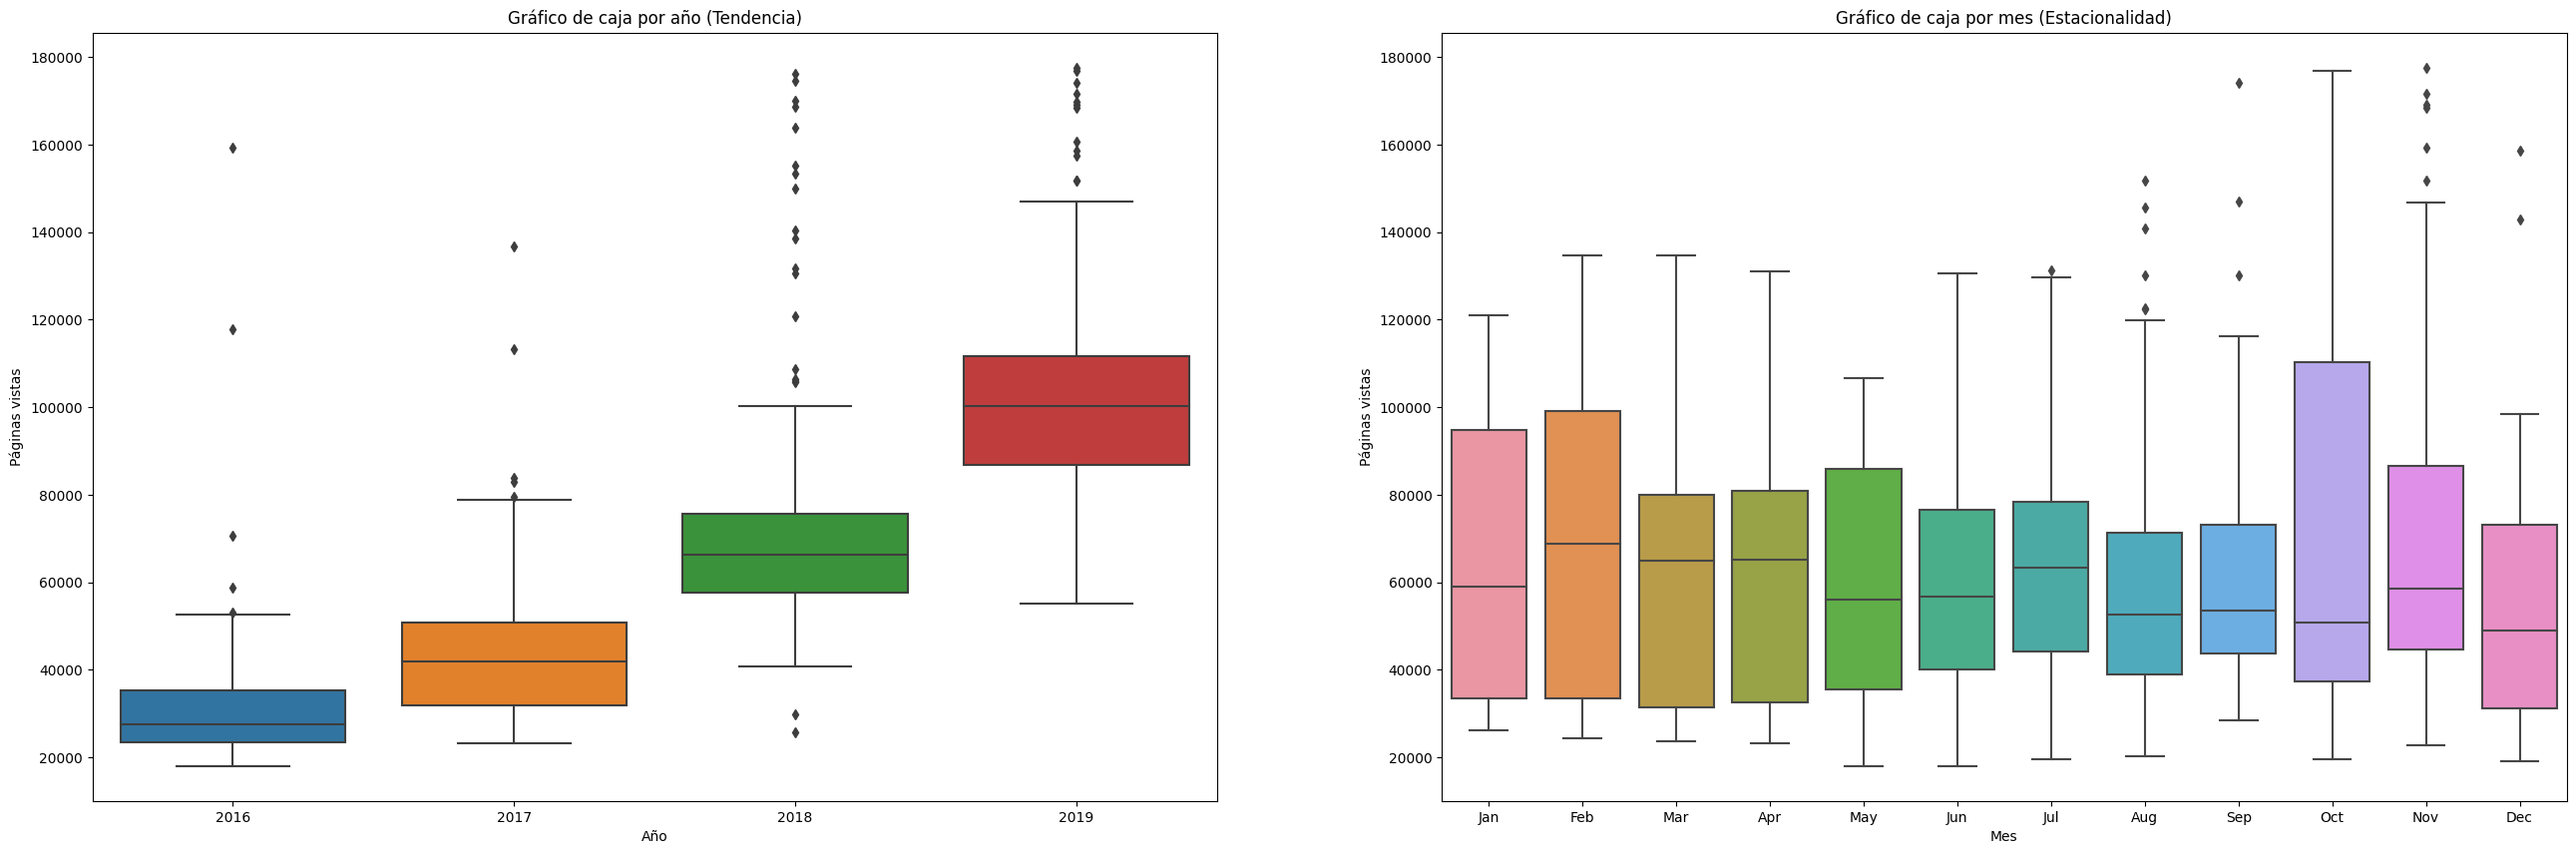

In [12]:
draw_box_plot()

,date,value,year,month,day
0,2016-05-19,19736,2016,May,19
1,2016-05-26,18060,2016,May,26
2,2016-05-27,19997,2016,May,27
3,2016-05-28,19044,2016,May,28
4,2016-05-29,20325,2016,May,29
...,...,...,...,...,...
1233,2019-11-24,138875,2019,Nov,24
1234,2019-11-29,171584,2019,Nov,29
1235,2019-11-30,141161,2019,Nov,30
1236,2019-12-01,142918,2019,Dec,1
